# $$ Assignments $$

   In this quiz, you will take your first step into the process of encoding. The aim of this quiz is to help you come to a better understanding of how to calculate a spike-triggered average and its use in determining the relevant features within a stimulus. We have provided you with an experimentally recorded set of spikes recorded from the famous H1 motion-sensitive neuron of the fly (in this case, Calliphora vicina) from the lab of Dr Robert de Ruyter van Steveninck. This neuron responds to motion: your job is find out how exactly it processes a motion stimulus. You are also given the velocity of a pattern of vertical bars experienced by the fly during the recording of those spikes. Your job is to write a bit of Matlab/Octave/Python code to read the data and compute the spike-triggered average from methods you have learned throughout this week's lectures.

<type 'dict'>
[0 0 0 ..., 0 0 0]
[ 17  22  25  31  34  39  44  48  50  56  61  66  71  81 102 109 117 126]
53583
150
[-298 -296 -294 -292 -290 -288 -286 -284 -282 -280 -278 -276 -274 -272 -270
 -268 -266 -264 -262 -260 -258 -256 -254 -252 -250 -248 -246 -244 -242 -240
 -238 -236 -234 -232 -230 -228 -226 -224 -222 -220 -218 -216 -214 -212 -210
 -208 -206 -204 -202 -200 -198 -196 -194 -192 -190 -188 -186 -184 -182 -180
 -178 -176 -174 -172 -170 -168 -166 -164 -162 -160 -158 -156 -154 -152 -150
 -148 -146 -144 -142 -140 -138 -136 -134 -132 -130 -128 -126 -124 -122 -120
 -118 -116 -114 -112 -110 -108 -106 -104 -102 -100  -98  -96  -94  -92  -90
  -88  -86  -84  -82  -80  -78  -76  -74  -72  -70  -68  -66  -64  -62  -60
  -58  -56  -54  -52  -50  -48  -46  -44  -42  -40  -38  -36  -34  -32  -30
  -28  -26  -24  -22  -20  -18  -16  -14  -12  -10   -8   -6   -4   -2    0]


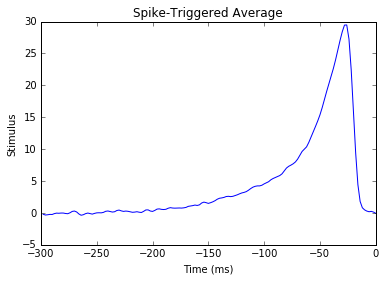

In [58]:
"""
Created on Wed Apr 22 15:21:11 2015

@author: rkp

Code to compute spike-triggered average.
"""

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for specified number of timesteps before spike"""
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
    qqq = rho[:num_timesteps]
    print qqq.nonzero()[0]
    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = len(spike_times)
    print num_spikes
    
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    # 
    # Your code goes here.
    for i in range(1, num_spikes):
        spike = spike_times[i]
        sta = sta + stim[spike-num_timesteps:spike]
    sta = sta / num_spikes
    return sta






"""
Created on Wed Apr 22 15:15:16 2015

@author: rkp

Quiz 2 code.
"""

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

import pickle



FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)
print type(data)    
stim = data['stim']
rho = data['rho']
print rho
# Fill in these values
sampling_period = 2 # in ms
num_timesteps = 150

sta = compute_sta(stim, rho, num_timesteps)
print len(sta)
time = (np.arange(-num_timesteps, 0) + 1) * sampling_period
print time
plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')
plt.show()

In [47]:
time_series = np.arange(0,len(rho))
print time_series

[     0      1      2 ..., 599997 599998 599999]
